In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-26-18-29_BanditRealWorldRewards_/BanditRealWorldRewards.csv")

In [3]:
masterdata.head()

,bandit,dataset,scalingstrategy,reward,k,gain,cputime,iteration
0,OD,Bioliq_S-MAB_1wx20_MI_1000_100,No-63,AbsoluteThreshold(0.5),63.0,63.0,0.1182,0
1,OD,Bioliq_S-MAB_1wx20_MI_1000_100,No-63,AbsoluteThreshold(0.5),63.0,63.0,0.0911,1
2,OD,Bioliq_S-MAB_1wx20_MI_1000_100,No-63,AbsoluteThreshold(0.5),63.0,63.0,0.0905,2
3,OD,Bioliq_S-MAB_1wx20_MI_1000_100,No-63,AbsoluteThreshold(0.5),63.0,55.0,0.0894,3
4,OD,Bioliq_S-MAB_1wx20_MI_1000_100,No-63,AbsoluteThreshold(0.5),63.0,54.0,0.0890,4


In [4]:
masterdata.reward.unique()

array(['AbsoluteThreshold(0.5)', 'AbsoluteThreshold(1.0)',
       'AbsoluteThreshold(1.5)', 'AbsoluteThreshold(2.0)',
       'AbsoluteThreshold(2.5)', 'AbsoluteThreshold(3.0)'], dtype=object)

In [5]:
masterdata.groupby("bandit").mean()

,k,gain,cputime,iteration
bandit,,,,
MP-TS-ADWIN-0.1,92.496096,51.113987,0.495314,3019
OD,89.844288,47.360003,0.211472,3019
OD-ADWIN-0.1,97.397510,55.012495,0.402022,3019
OR,48.547862,20.765355,0.060506,3019
OR-ADWIN-0.1,52.352990,24.273097,0.783661,3019
OS,86.193005,42.817893,0.080762,3019
OS-ADWIN-0.1,91.887436,49.856457,0.337687,3019


In [6]:
masterdata[masterdata["bandit"] == "bandit"]

,bandit,dataset,scalingstrategy,reward,k,gain,cputime,iteration


In [7]:
masterdata["bandit"].unique()

array(['OD', 'OS', 'OR', 'OS-ADWIN-0.1', 'OR-ADWIN-0.1', 'OD-ADWIN-0.1',
       'MP-TS-ADWIN-0.1'], dtype=object)

In [8]:
masterdata["scalingstrategy"].unique()

array(['No-63', 'No-19', 'No-95', 'KL-1-190-0.8', 'No-47', 'No-38',
       'No-190', 'KL-1-190-0.3', 'KL-1-190-0.2', 'KL-1-190-0.4',
       'KL-1-190-0.1', 'KL-1-190-0.9', 'KL-1-190-0.5', 'KL-1-190-0.6',
       'KL-1-190-0.7'], dtype=object)

In [9]:
len(masterdata["bandit"].unique())

7

In [10]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

<IPython.core.display.Javascript object>


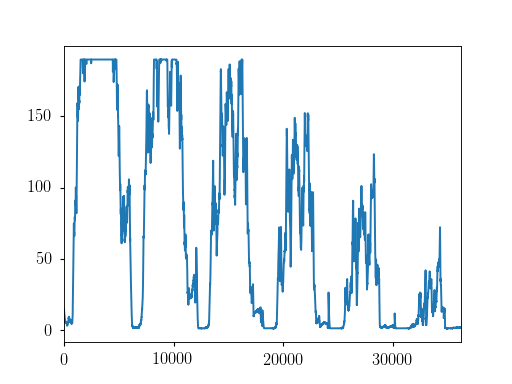

In [11]:
%matplotlib notebook
condition = (masterdata["bandit"] == 'MP-TS-ADWIN-0.1') & (masterdata["scalingstrategy"] == 'KL-1-190-0.8')
masterdata[condition].reset_index()['k'].plot()

<IPython.core.display.Javascript object>


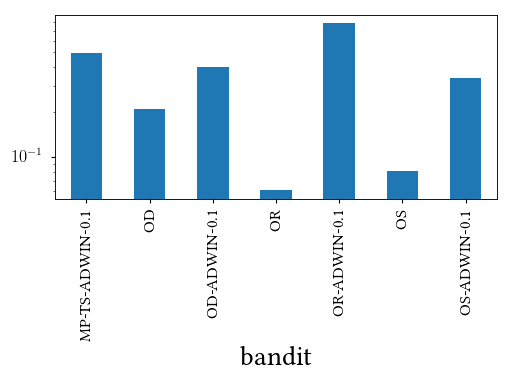

In [12]:
%matplotlib notebook
masterdata.groupby(["bandit"])[['gain', 'k', 'reward/arm', 'cputime']].mean()["cputime"].plot(kind="bar", logy=True)
plt.tight_layout()

In [13]:
masterdata["bandit"].unique()

array(['OD', 'OS', 'OR', 'OS-ADWIN-0.1', 'OR-ADWIN-0.1', 'OD-ADWIN-0.1',
       'MP-TS-ADWIN-0.1'], dtype=object)

In [14]:
cubelix9 = sns.color_palette("husl", 9)
cubelix6 = sns.color_palette("husl", 6)

In [15]:
plotkind = "small"

shortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             'OS']

prettynames = {
    "KL-1-190-0.1": "KL-S; $\eta^* = 0.1$",
    "KL-1-190-0.2": "KL-S; $\eta^* = 0.2$",
    "KL-1-190-0.3": "KL-S; $\eta^* = 0.3$",
    "KL-1-190-0.4": "KL-S; $\eta^* = 0.4$",
    "KL-1-190-0.5": "KL-S; $\eta^* = 0.5$",
    "KL-1-190-0.6": "KL-S; $\eta^* = 0.6$",
    "KL-1-190-0.7": "KL-S; $\eta^* = 0.7$",
    "KL-1-190-0.8": "KL-S; $\eta^* = 0.8$",
    "KL-1-190-0.9": "KL-S; $\eta^* = 0.9$",
    
    "No-19": "No Scaling; $L= K/10$",
    "No-38": r'No Scaling; $L= K/5$',
    "No-47": r'No Scaling; $L= K/4$',
    "No-63": r'No Scaling; $L= K/3$',
    "No-95": r'No Scaling; $L= K/2$',
    "No-190": r'No Scaling; $L= K$',
    
    "CUCB": "S-CUCB",
    "Exp3.M.": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-TS": "S-TS",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-Oracle",
    'OD-ADWIN-0.1': "Oracle-ADWIN (Dynamic)",
    'OR-ADWIN-0.1': "Oracle-ADWIN (Random)",
    'OS-ADWIN-0.1': "Oracle-ADWIN (Static)",
    'OSeq-ADWIN-0.1':  "Oracle-ADWIN (Sequential)",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN; $\delta=0.1$',
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN; $\delta=0.1$",
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN; $\delta=0.1$",
    
    'MP-DTS; g=0.7': "S-DTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-DTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-DTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-DTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN; $\delta=0.1$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

styledictionary = {
    "KL-1-190-0.1": {'marker': '+', 'color': cubelix9[0]},
    "KL-1-190-0.2": {'marker': '+', 'color': cubelix9[1]},
    "KL-1-190-0.3": {'marker': '+', 'color': cubelix9[2]},
    "KL-1-190-0.4": {'marker': '+', 'color': cubelix9[3]},
    "KL-1-190-0.5": {'marker': '+', 'color': cubelix9[4]},
    "KL-1-190-0.6": {'marker': '+', 'color': cubelix9[5]},
    "KL-1-190-0.7": {'marker': '+', 'color': cubelix9[6]},
    "KL-1-190-0.8": {'marker': '+', 'color': cubelix9[7]},
    "KL-1-190-0.9": {'marker': '+', 'color': cubelix9[8]},
    
    "No-19": {'marker': '+', 'color': cubelix6[5]},
    "No-38": {'marker': '+', 'color': cubelix6[4]},
    "No-47": {'marker': '+', 'color': cubelix6[3]},
    "No-63": {'marker': '+', 'color': cubelix6[2]},
    "No-95": {'marker': '+', 'color': cubelix6[1]},
    "No-190": {'marker': '+', 'color': cubelix6[0]},
}

<IPython.core.display.Javascript object>


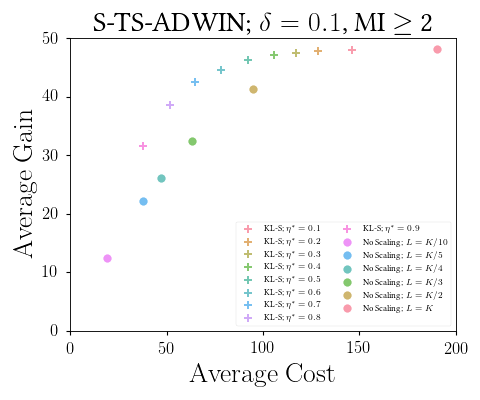

KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 0.3$
KL-S; $\eta^* = 0.4$
KL-S; $\eta^* = 0.5$
KL-S; $\eta^* = 0.6$
KL-S; $\eta^* = 0.7$
KL-S; $\eta^* = 0.8$
KL-S; $\eta^* = 0.9$
No Scaling; $L= K/10$
No Scaling; $L= K/5$
No Scaling; $L= K/4$
No Scaling; $L= K/3$
No Scaling; $L= K/2$
No Scaling; $L= K$


In [21]:
%matplotlib notebook

plt.figure(figsize=(6,5))

reward = "AbsoluteThreshold(2.0)"
approach = 'MP-TS-ADWIN-0.1'
subdata = masterdata[masterdata["reward"] == reward]
subdata = subdata[subdata["bandit"] == approach]
means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means

for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
    else:
        marker = "+"
    plt.scatter(x=p['k'], y=p["gain"], marker=marker, 
                label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])
    

plt.legend(ncol=2, fontsize=8)
plt.title("%s, MI $\geq$ 2"%(prettynames[approach]))
plt.ylabel(r"$\mathrm{Average~Gain}$")
plt.xlabel(r"$\mathrm{Average~Cost}$")

plt.xlim(0,200)
plt.ylim(0,50)
plt.tight_layout()

plt.savefig("RealWorld_S-TS-ADWIN_MI_2.pdf")

<IPython.core.display.Javascript object>


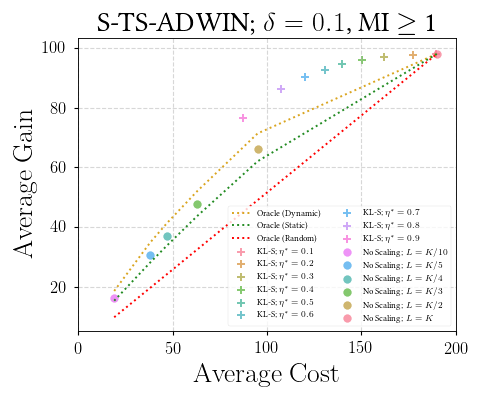

KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 0.3$
KL-S; $\eta^* = 0.4$
KL-S; $\eta^* = 0.5$
KL-S; $\eta^* = 0.6$
KL-S; $\eta^* = 0.7$
KL-S; $\eta^* = 0.8$
KL-S; $\eta^* = 0.9$
No Scaling; $L= K/10$
No Scaling; $L= K/5$
No Scaling; $L= K/4$
No Scaling; $L= K/3$
No Scaling; $L= K/2$
No Scaling; $L= K$


In [20]:
%matplotlib notebook

plt.figure(figsize=(6,5))

MI = "1"
reward = "AbsoluteThreshold(%s.0)"%MI
approach = 'MP-TS-ADWIN-0.1'
rewards = masterdata[masterdata["reward"] == reward]
subdata = rewards[rewards["bandit"] == approach]

means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
    else:
        marker = "+"
    plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])
    
os = rewards[rewards["bandit"] == "OD"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label="Oracle (Dynamic)", marker="", c="goldenrod", linestyle=":")

os = rewards[rewards["bandit"] == "OS"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label="Oracle (Static)", marker="", c="forestgreen", linestyle=":")

OR = rewards[rewards["bandit"] == "OR"]
or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
or_means.loc[[x for x in or_means.index if "No" in x]]
or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(or_means['k'], or_means["gain"], label="Oracle (Random)", marker="", c="red", linestyle=":")

plt.legend(ncol=2, fontsize=8)
plt.title("%s, MI $\geq$ %s"%(prettynames[approach],MI))
plt.ylabel(r"$\mathrm{Average~Gain}$")
plt.xlabel(r"$\mathrm{Average~Cost}$")

plt.xlim(0,200)

plt.tight_layout()
plt.savefig("RealWorld_S-TS-ADWIN_MI_1.pdf")

<IPython.core.display.Javascript object>


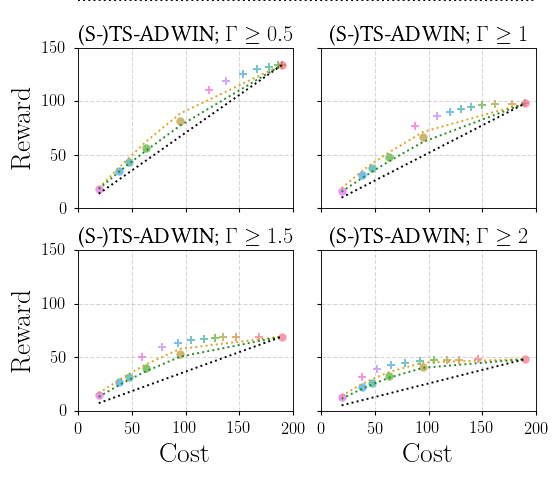

KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 0.3$
KL-S; $\eta^* = 0.4$
KL-S; $\eta^* = 0.5$
KL-S; $\eta^* = 0.6$
KL-S; $\eta^* = 0.7$
KL-S; $\eta^* = 0.8$
KL-S; $\eta^* = 0.9$
No Scaling; $L= K/10$
No Scaling; $L= K/5$
No Scaling; $L= K/4$
No Scaling; $L= K/3$
No Scaling; $L= K/2$
No Scaling; $L= K$
KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 0.3$
KL-S; $\eta^* = 0.4$
KL-S; $\eta^* = 0.5$
KL-S; $\eta^* = 0.6$
KL-S; $\eta^* = 0.7$
KL-S; $\eta^* = 0.8$
KL-S; $\eta^* = 0.9$
No Scaling; $L= K/10$
No Scaling; $L= K/5$
No Scaling; $L= K/4$
No Scaling; $L= K/3$
No Scaling; $L= K/2$
No Scaling; $L= K$
KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 0.3$
KL-S; $\eta^* = 0.4$
KL-S; $\eta^* = 0.5$
KL-S; $\eta^* = 0.6$
KL-S; $\eta^* = 0.7$
KL-S; $\eta^* = 0.8$
KL-S; $\eta^* = 0.9$
No Scaling; $L= K/10$
No Scaling; $L= K/5$
No Scaling; $L= K/4$
No Scaling; $L= K/3$
No Scaling; $L= K/2$
No Scaling; $L= K$
KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 

In [22]:
%matplotlib notebook

f, axarr = plt.subplots(2,2, figsize=(7,6), sharex=True, sharey=True)
axes = axarr.flatten()

######################
plt.sca(axes[0])

MI = "0.5"
reward = "AbsoluteThreshold(%s)"%MI
approach = 'MP-TS-ADWIN-0.1'
rewards = masterdata[masterdata["reward"] == reward]
subdata = rewards[rewards["bandit"] == approach]

means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
    else:
        marker = "+"
    plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                label=None, alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])
    
os = rewards[rewards["bandit"] == "OD"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label="Oracle (Dynamic)", marker="", c="goldenrod", linestyle=":")

os = rewards[rewards["bandit"] == "OS"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label="Oracle (Static)", marker="", c="forestgreen", linestyle=":")

OR = rewards[rewards["bandit"] == "OR"]
or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
or_means.loc[[x for x in or_means.index if "No" in x]]
or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(or_means['k'], or_means["gain"], label="Oracle (Random)", marker="", c="black", linestyle=":")

plt.title("(S-)TS-ADWIN; $\Gamma \geq %s$"%(MI), fontsize = 20)
plt.ylabel(r"$\mathrm{Reward}$")

plt.ylim((0,150))
plt.axhline(y=195, xmin=0, xmax= 2.13, c="black", linestyle=":", clip_on=False)
plt.xlim(0,200)
plt.xticks([0,50,100,150,200])

################################
plt.sca(axes[1])

MI = "1"
reward = "AbsoluteThreshold(%s.0)"%MI
approach = 'MP-TS-ADWIN-0.1'
rewards = masterdata[masterdata["reward"] == reward]
subdata = rewards[rewards["bandit"] == approach]

means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
        label = prettynames[point]
    else:
        marker = "+"
        label= None
    plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                label=label, alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])

os = rewards[rewards["bandit"] == "OD"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label=None, marker="", c="goldenrod", linestyle=":")

os = rewards[rewards["bandit"] == "OS"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label=None, marker="", c="forestgreen", linestyle=":")

OR = rewards[rewards["bandit"] == "OR"]
or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
or_means.loc[[x for x in or_means.index if "No" in x]]
or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(or_means['k'], or_means["gain"], label=None, marker="", c="black", linestyle=":")


plt.title("(S-)TS-ADWIN; $\Gamma \geq %s$"%(MI), fontsize = 20)
plt.xticks([0,50,100,150,200])

plt.ylim((0,150))
plt.xlim(0,200)

########################################

plt.sca(axes[2])

MI = "1.5"
reward = "AbsoluteThreshold(%s)"%MI
approach = 'MP-TS-ADWIN-0.1'
rewards = masterdata[masterdata["reward"] == reward]
subdata = rewards[rewards["bandit"] == approach]

means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
        label = None
    else:
        marker = "+"
        label= prettynames[point]
    plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                label=label, alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])

os = rewards[rewards["bandit"] == "OD"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label=None, marker="", c="goldenrod", linestyle=":")

os = rewards[rewards["bandit"] == "OS"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label=None, marker="", c="forestgreen", linestyle=":")

OR = rewards[rewards["bandit"] == "OR"]
or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
or_means.loc[[x for x in or_means.index if "No" in x]]
or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(or_means['k'], or_means["gain"], label=None, marker="", c="black", linestyle=":")


plt.title("(S-)TS-ADWIN; $\Gamma \geq %s$"%(MI), fontsize = 20)
plt.ylabel(r"$\mathrm{Reward}$")
plt.xlabel(r"$\mathrm{Cost}$")

plt.xlim(0,200)
plt.xticks([0,50,100,150,200])

############################################

plt.sca(axes[3])

MI = "2"
reward = "AbsoluteThreshold(%s.0)"%MI
approach = 'MP-TS-ADWIN-0.1'
rewards = masterdata[masterdata["reward"] == reward]
subdata = rewards[rewards["bandit"] == approach]

means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
        label = None
    else:
        marker = "+"
        label= prettynames[point]
    plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                label=label, alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])

os = rewards[rewards["bandit"] == "OD"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label=None, marker="", c="goldenrod", linestyle=":")

os = rewards[rewards["bandit"] == "OS"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label=None, marker="", c="forestgreen", linestyle=":")

OR = rewards[rewards["bandit"] == "OR"]
or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
or_means.loc[[x for x in or_means.index if "No" in x]]
or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(or_means['k'], or_means["gain"], label=None, marker="", c="black", linestyle=":")


plt.title("(S-)TS-ADWIN; $\Gamma \geq %s$"%(MI), fontsize = 20)
plt.xlabel(r"$\mathrm{Cost}$")

plt.xlim(0,200)
plt.xticks([0,50,100,150,200])

plt.tight_layout()

f.subplots_adjust(top=0.9)

plt.savefig("RealWorldRewards.pdf")